In [ ]:
!pip install --upgrade pip
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install joblib

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, accuracy_score
import matplotlib.pyplot as plt

In [ ]:
# Example: Import data from csv-file stored on Google Drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading Data into Pandas DataFrame

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/sales_data.csv', encoding='latin-1')

# Displaying first 10 rows

In [ ]:
data.head(10)

,Date,Region,Product Category,Product,Sales,COGS,Units Sold,Discount Rate,Marketing Spend,Advertising Spend,Inflation Rate,Customer Satisfaction Score,Number of Returns,Latitude,Longitude,Unemployment Rate,CPI
0,2012-01-31,Berlin,Electronics,Smartphone,33962,17233,1287,0.093174,4523,3767,1.295134,3.114154,127,52.5200,13.4050,4.368183,106.120146
1,2012-01-31,Munich,Electronics,Smartphone,28545,14407,562,0.141121,4134,3675,1.108771,4.603254,54,48.1351,11.5820,4.368183,106.120146
2,2012-01-31,Hamburg,Electronics,Smartphone,20821,11349,478,0.119815,2134,1723,1.212714,4.055748,24,53.5511,9.9937,4.368183,106.120146
3,2012-01-31,Cologne,Electronics,Smartphone,11768,5509,874,0.107143,1395,723,1.221269,4.763577,65,50.9375,6.9603,4.368183,106.120146
4,2012-01-31,Berlin,Electronics,Laptop,18909,10028,1120,0.093169,3686,2731,2.974549,3.879253,92,52.5200,13.4050,4.368183,106.120146
5,2012-01-31,Munich,Electronics,Laptop,49081,24088,1458,0.144368,8343,4564,1.179982,3.452156,142,48.1351,11.5820,4.368183,106.120146
6,2012-01-31,Hamburg,Electronics,Laptop,32398,18023,342,0.131285,4811,4532,1.782027,4.059620,23,53.5511,9.9937,4.368183,106.120146
7,2012-01-31,Cologne,Electronics,Laptop,44387,20493,993,0.099303,7317,3332,1.506473,3.794045,34,50.9375,6.9603,4.368183,106.120146
8,2012-01-31,Berlin,Clothing,T-Shirt,32731,16993,685,0.135288,4550,2073,2.652256,4.557134,62,52.5200,13.4050,4.368183,106.120146
9,2012-01-31,Munich,Clothing,T-Shirt,16564,9368,1087,0.185925,2469,1291,1.513094,3.010632,47,48.1351,11.5820,4.368183,106.120146


In [ ]:
# checking for NaNs
print(data.isnull().sum())

Date                           0
Region                         0
Product Category               0
Product                        0
Sales                          0
COGS                           0
Units Sold                     0
Discount Rate                  0
Marketing Spend                0
Advertising Spend              0
Inflation Rate                 0
Customer Satisfaction Score    0
Number of Returns              0
Latitude                       0
Longitude                      0
Unemployment Rate              0
CPI                            0
dtype: int64


In [ ]:
data.columns

Index(['Date', 'Region', 'Product Category', 'Product', 'Sales', 'COGS',
       'Units Sold', 'Discount Rate', 'Marketing Spend', 'Advertising Spend',
       'Inflation Rate', 'Customer Satisfaction Score', 'Number of Returns',
       'Latitude', 'Longitude', 'Unemployment Rate', 'CPI'],
      dtype='object')

In [ ]:
# creating a copy
data_one = data.copy()

# Data Pre-processing

In [ ]:
# Converting Date to DateTime
data_one['Date'] = pd.to_datetime(data_one['Date'])

In [ ]:
# encoding categorical values
categorical_columns = ['Region', 'Product Category', 'Product']
le = LabelEncoder()
for col in categorical_columns:
    data_one[col] = le.fit_transform(data_one[col])

# Split data to Input Features (X) and Output Features (y)

In [ ]:
X = data_one[['Date', 'Region', 'Product Category', 'Product', 'Sales', 'COGS',
              'Discount Rate', 'Marketing Spend', 'Advertising Spend',
              'Inflation Rate', 'Customer Satisfaction Score',
              'Number of Returns','Unemployment Rate', 'CPI', 'Units Sold']]

y = data_one['Units Sold']

In [ ]:
X.head(5)

,Date,Region,Product Category,Product,Sales,COGS,Discount Rate,Marketing Spend,Advertising Spend,Inflation Rate,Customer Satisfaction Score,Number of Returns,Unemployment Rate,CPI,Units Sold
0,2012-01-31,0,2,6,33962,17233,0.093174,4523,3767,1.295134,3.114154,127,4.368183,106.120146,1287
1,2012-01-31,3,2,6,28545,14407,0.141121,4134,3675,1.108771,4.603254,54,4.368183,106.120146,562
2,2012-01-31,2,2,6,20821,11349,0.119815,2134,1723,1.212714,4.055748,24,4.368183,106.120146,478
3,2012-01-31,1,2,6,11768,5509,0.107143,1395,723,1.221269,4.763577,65,4.368183,106.120146,874
4,2012-01-31,0,2,3,18909,10028,0.093169,3686,2731,2.974549,3.879253,92,4.368183,106.120146,1120


# Feature Engineering

In [ ]:
# Exacting day of week and month
X['DayOfWeek'] = X['Date'].dt.dayofweek
X['Month'] = X['Date'].dt.month

<ipython-input-13-dff9c722797a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['DayOfWeek'] = X['Date'].dt.dayofweek


In [ ]:
# Creating Interactions
X['Sales_COGS_Ratio'] = X['Sales'] / X['COGS']
X['Price_Per_Unit'] = X['Sales'] / X['Units Sold']
X['Sales_Customer_Satisfaction'] = X['Sales'] * X['Customer Satisfaction Score']
X['Sales_Discount'] = X['Sales'] * X['Discount Rate']
X['Sales_Marketing'] = X['Sales'] * X['Marketing Spend']
X['Sales_Advertising'] = X['Sales'] * X['Advertising Spend']

In [ ]:
# Dropping Date and Units Sold column
X = X.drop(['Date', 'Units Sold'], axis=1)

In [ ]:
X.head(5)

,Region,Product Category,Product,Sales,COGS,Discount Rate,Marketing Spend,Advertising Spend,Inflation Rate,Customer Satisfaction Score,...,Unemployment Rate,CPI,DayOfWeek,Month,Sales_COGS_Ratio,Price_Per_Unit,Sales_Customer_Satisfaction,Sales_Discount,Sales_Marketing,Sales_Advertising
0,0,2,6,33962,17233,0.093174,4523,3767,1.295134,3.114154,...,4.368183,106.120146,1,1,1.970754,26.388500,105762.905305,3164.372457,153610126,127934854
1,3,2,6,28545,14407,0.141121,4134,3675,1.108771,4.603254,...,4.368183,106.120146,1,1,1.981329,50.791815,131399.885303,4028.290057,118005030,104902875
2,2,2,6,20821,11349,0.119815,2134,1723,1.212714,4.055748,...,4.368183,106.120146,1,1,1.834611,43.558577,84444.738399,2494.665959,44432014,35874583
3,1,2,6,11768,5509,0.107143,1395,723,1.221269,4.763577,...,4.368183,106.120146,1,1,2.136141,13.464531,56057.777534,1260.857326,16416360,8508264
4,0,2,3,18909,10028,0.093169,3686,2731,2.974549,3.879253,...,4.368183,106.120146,1,1,1.885620,16.883036,73352.797694,1761.730617,69698574,51640479


In [ ]:
# Scale numerical features
scaler = StandardScaler()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
X.head(5)

,Region,Product Category,Product,Sales,COGS,Discount Rate,Marketing Spend,Advertising Spend,Inflation Rate,Customer Satisfaction Score,...,Unemployment Rate,CPI,DayOfWeek,Month,Sales_COGS_Ratio,Price_Per_Unit,Sales_Customer_Satisfaction,Sales_Discount,Sales_Marketing,Sales_Advertising
0,-1.341641,0.0,0.522233,0.324457,0.348239,-0.979201,-0.002948,0.504461,-1.225798,-1.537495,...,-0.473765,-0.221085,1,1,-0.228441,-0.569170,-0.299420,-0.534903,-0.028166,0.296780
1,1.341641,0.0,0.522233,-0.143404,-0.116549,-0.149680,-0.201099,0.442663,-1.550972,1.055466,...,-0.473765,-0.221085,1,1,-0.184103,0.121134,0.213614,-0.197990,-0.346663,0.006521
2,0.447214,0.0,0.522233,-0.810519,-0.619494,-0.518289,-1.219868,-0.868525,-1.369608,0.102098,...,-0.473765,-0.221085,1,1,-0.799264,-0.083475,-0.726028,-0.796078,-1.004793,-0.863403
3,-0.447214,0.0,0.522233,-1.592418,-1.579990,-0.737526,-1.596303,-1.540240,-1.354681,1.334636,...,-0.473765,-0.221085,1,1,0.464997,-0.934754,-1.294094,-1.277242,-1.255401,-1.208285
4,-1.341641,0.0,-0.522233,-0.975656,-0.836757,-0.979288,-0.429303,-0.191436,1.704521,-0.205232,...,-0.473765,-0.221085,1,1,-0.585391,-0.838053,-0.947994,-1.081910,-0.778777,-0.664714


In [ ]:
# correlation analysis
correlation_matrix = X.corr()
high_corr_features = np.where(correlation_matrix.abs() > 0.5)
high_corr_features = [(correlation_matrix.columns[x], correlation_matrix.columns[y])
 for x, y in zip(*high_corr_features) if x != y and x < y]

In [ ]:
print("High correlation features:")
for feat1, feat2 in high_corr_features:
    print(f"{feat1} - {feat2}: {correlation_matrix.loc[feat1, feat2]:.2f}")

High correlation features:
Sales - COGS: 0.95
Sales - Marketing Spend: 0.88
Sales - Advertising Spend: 0.77
Sales - Sales_Customer_Satisfaction: 0.93
Sales - Sales_Discount: 0.69
Sales - Sales_Marketing: 0.93
Sales - Sales_Advertising: 0.87
COGS - Marketing Spend: 0.83
COGS - Advertising Spend: 0.74
COGS - Sales_Customer_Satisfaction: 0.89
COGS - Sales_Discount: 0.65
COGS - Sales_Marketing: 0.89
COGS - Sales_Advertising: 0.83
Discount Rate - Sales_Discount: 0.69
Marketing Spend - Advertising Spend: 0.68
Marketing Spend - Sales_Customer_Satisfaction: 0.82
Marketing Spend - Sales_Discount: 0.60
Marketing Spend - Sales_Marketing: 0.97
Marketing Spend - Sales_Advertising: 0.77
Advertising Spend - Sales_Customer_Satisfaction: 0.71
Advertising Spend - Sales_Discount: 0.52
Advertising Spend - Sales_Marketing: 0.72
Advertising Spend - Sales_Advertising: 0.96
Number of Returns - Price_Per_Unit: -0.52
Sales_Customer_Satisfaction - Sales_Discount: 0.64
Sales_Customer_Satisfaction - Sales_Marketin

# Hyperparameter Fine-Tuning

Using `GridSearchCV` for fine-tuning. Linear Regression doesn't have a lot of hyperparameters to fine-tune, so i'll be consider the most common ones. `fit_intercept`, whether to fit an intercept term,`copy_X`, whether to make a copy of the original dataset and `positive`, whether to interpret relationship between features and target variable.

In [ ]:
param_grid = {
    'fit_intercept': [True, False],
    'positive': [True, False],
    'copy_X': [True, False]
}

# Splitting to training and testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training Model

In [ ]:
model = GridSearchCV(LinearRegression(), param_grid, cv=5, scoring='neg_mean_squared_error')
model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'positive': [True, False]},
             scoring='neg_mean_squared_error')

# Getting the 'best' parameters for the model

In [ ]:
best_dt = model.best_estimator_
print("Best Linear Regression Parameters: ", model.best_params_)

Best Linear Regression Parameters:  {'copy_X': True, 'fit_intercept': True, 'positive': False}


# Making predictions on test set

In [ ]:
y_pred_lr = model.predict(X_test)

# Evaluation

In [ ]:
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R-squared: {r2:.2f}\n")

evaluate_model(y_test, y_pred_lr, "Linear Regression")

Linear Regression Performance:
MAE: 147.97
RMSE: 183.12
R-squared: 0.76



# Visualising Results

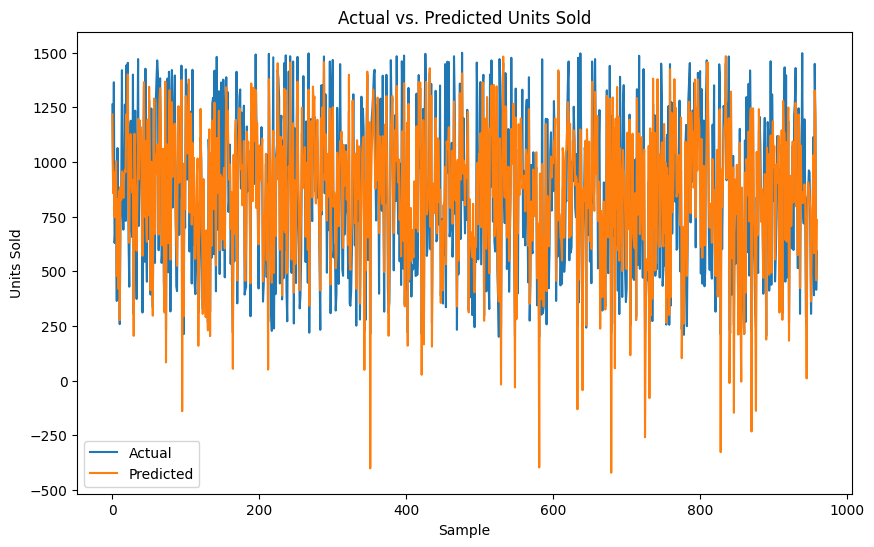

In [ ]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test)), y_test, label='Actual')
plt.plot(range(len(y_test)), y_pred_lr, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Units Sold')
plt.title('Actual vs. Predicted Units Sold')
plt.legend()
plt.show()

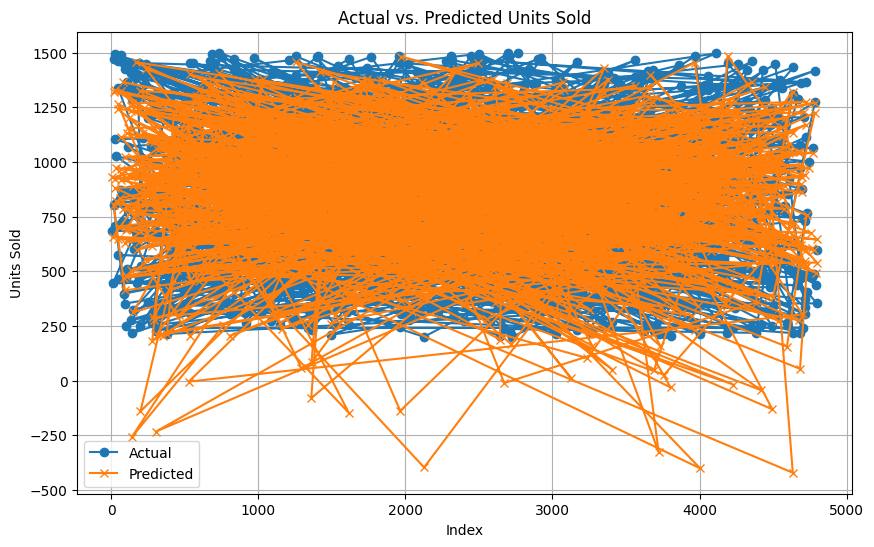

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual', marker='o')
plt.plot(y_test.index, y_pred_lr, label='Predicted', marker='x')
plt.xlabel('Index')
plt.ylabel('Units Sold')
plt.title('Actual vs. Predicted Units Sold')
plt.legend()
plt.grid(True)
plt.show()


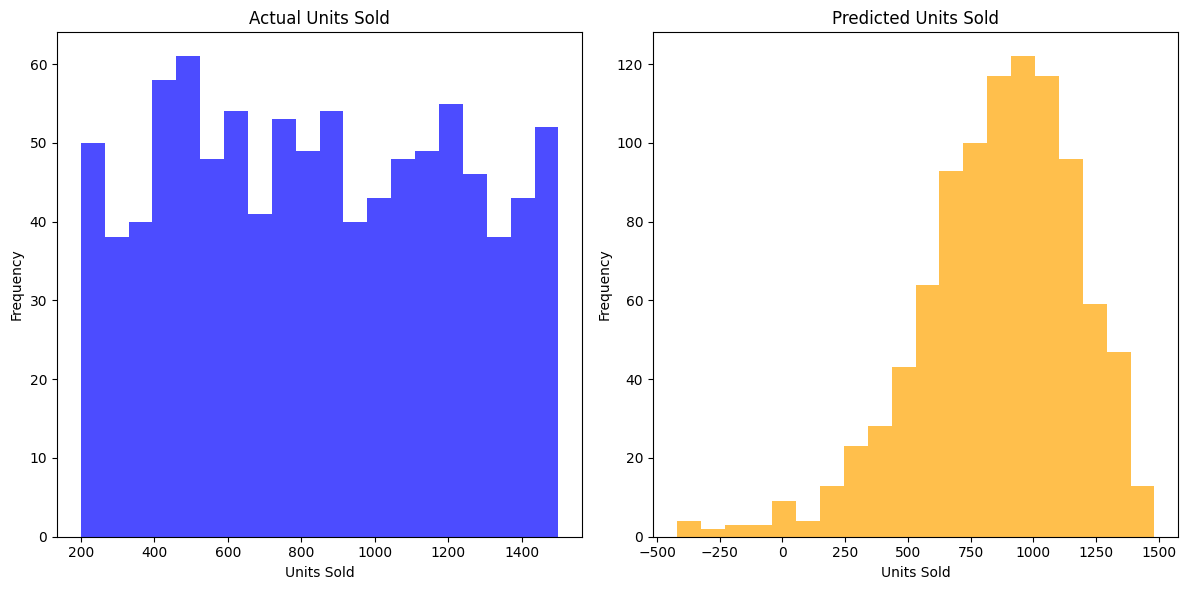

In [ ]:
# Plotting histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for actual values
axs[0].hist(y_test, bins=20, color='blue', alpha=0.7)
axs[0].set_title('Actual Units Sold')
axs[0].set_xlabel('Units Sold')
axs[0].set_ylabel('Frequency')

# Histogram for predicted values
axs[1].hist(y_pred_lr, bins=20, color='orange', alpha=0.7)
axs[1].set_title('Predicted Units Sold')
axs[1].set_xlabel('Units Sold')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()
